In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

gtd = pd.read_csv('Resource/globalterrorism.csv', encoding='ISO-8859-1')
gtd.head()

C:\Users\Layla Jeon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [28]:
gtddf['success'] = pd.to_numeric(terrorismdf['success'])

NameError: name 'terrorismdf' is not defined

# Attacks by Region with Attack Count

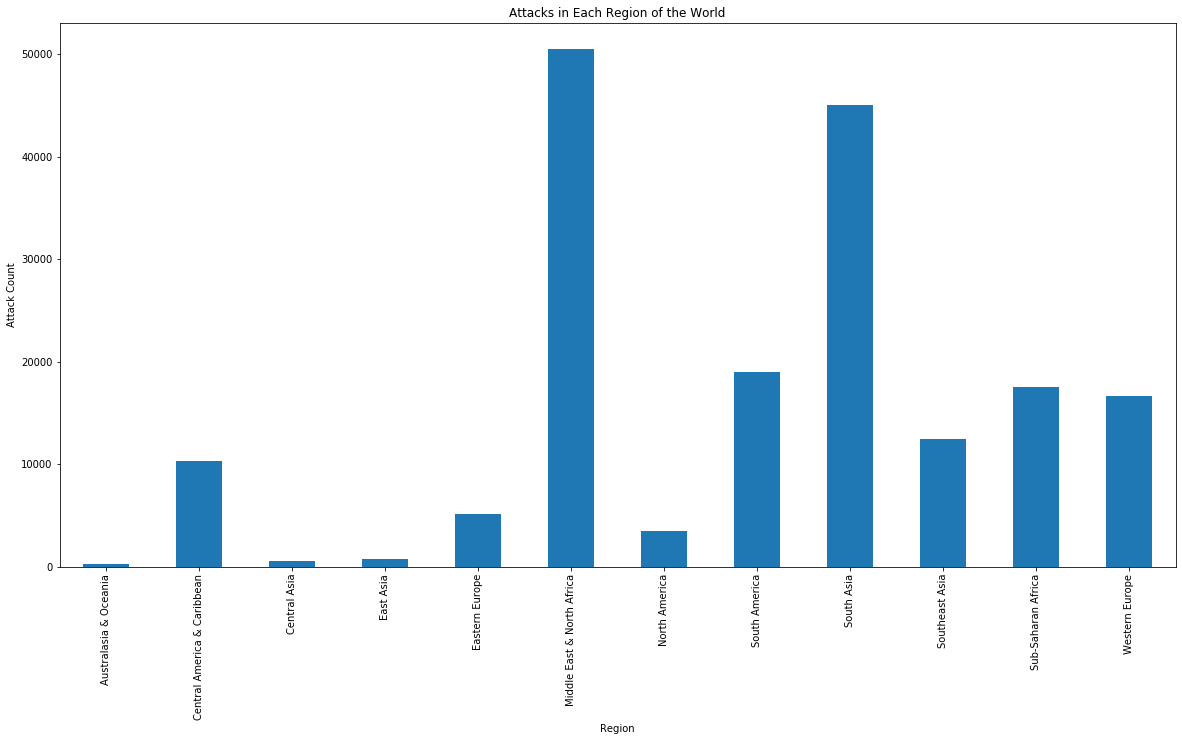

In [30]:
region = gtd.groupby("region_txt")
regionyear = region["iyear"]
total = len(gtd)
regionyears = regionyear.count()
regionyears.plot(kind="bar", figsize=(20,10))
plt.title("Attacks in Each Region of the World")
plt.xlabel("Region")
plt.ylabel("Attack Count")
plt.savefig("Images/RegionAttackBar.png")
plt.show()

# Attacks by Region with Percentage

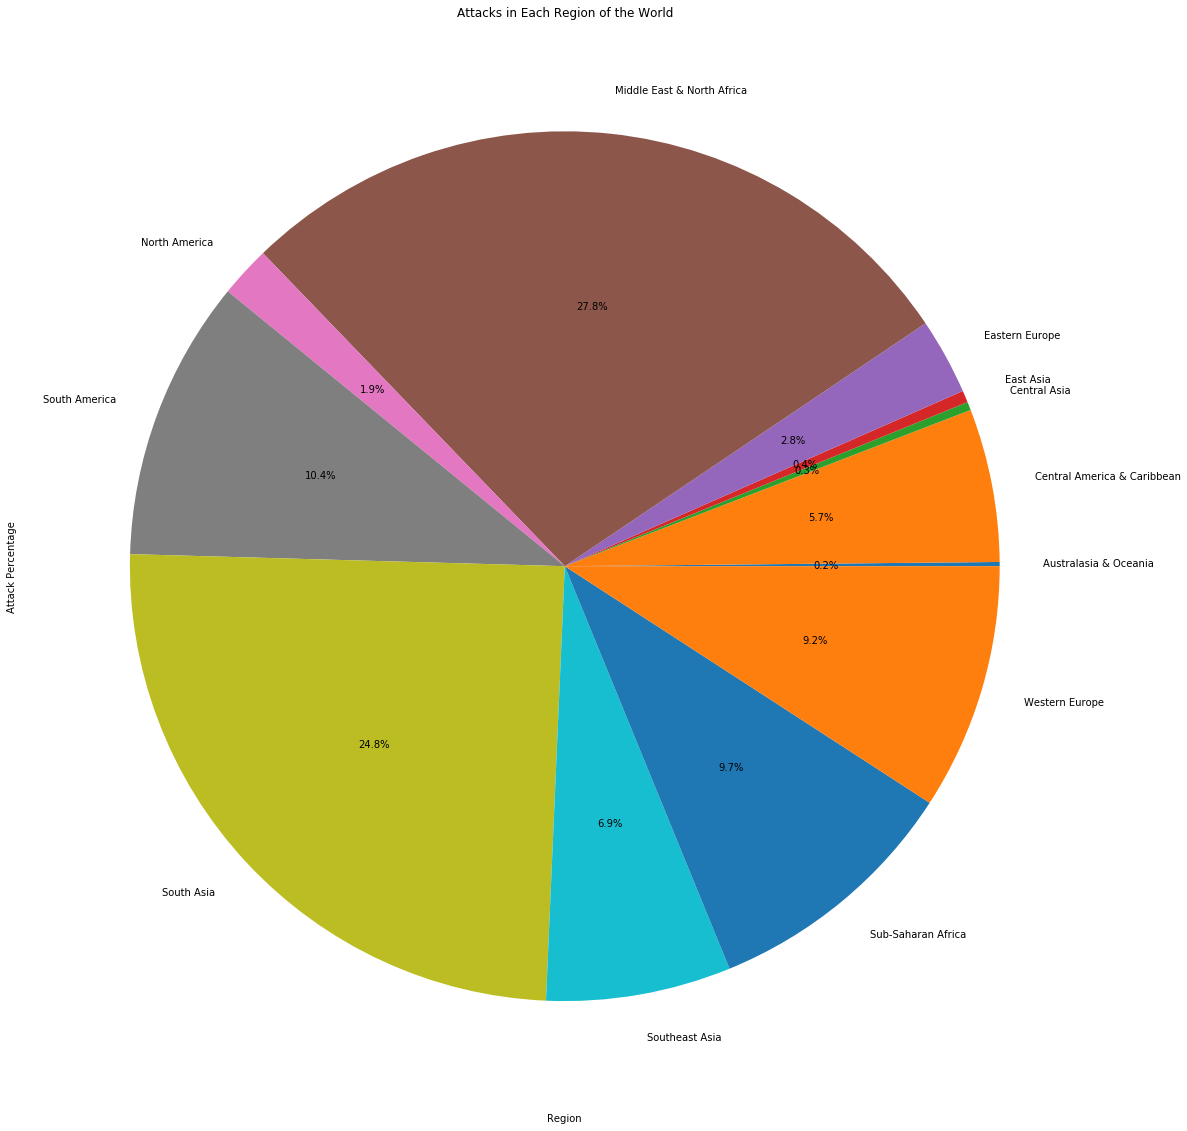

In [31]:
percentages = regionyears/total * 100
percentages
percentages.plot(kind="pie",autopct="%1.1f%%", figsize=(20,20))
plt.title("Attacks in Each Region of the World")
plt.xlabel("Region")
plt.ylabel("Attack Percentage")
plt.savefig("Images/RegionAttackPie.png")
plt.show()

# Top 15 Attacked Country 

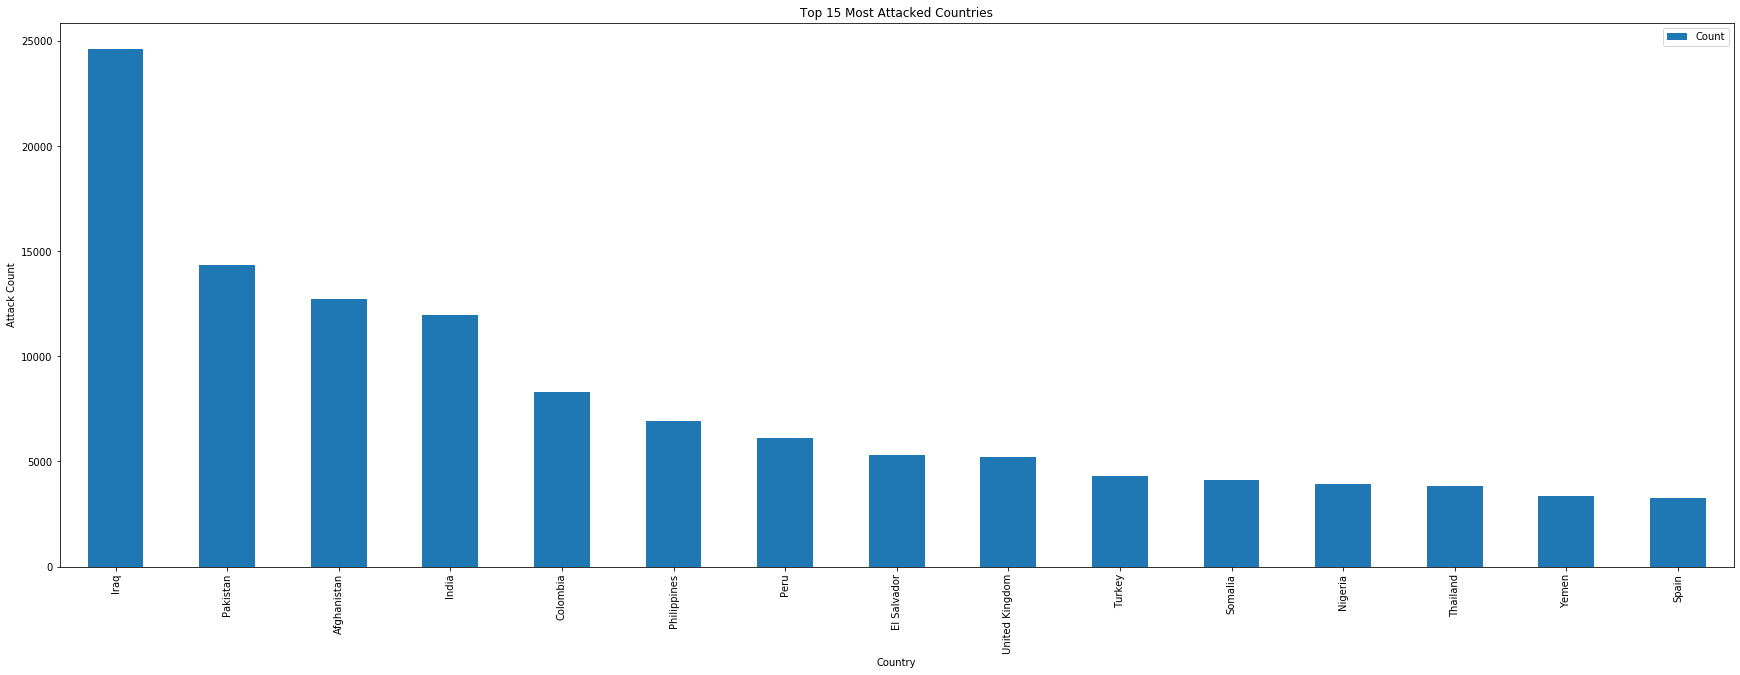

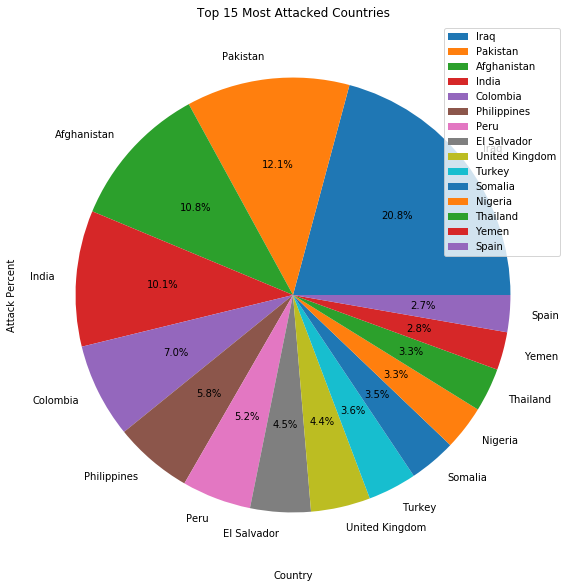

In [32]:
country = gtd.groupby("country_txt")["region_txt"].count()

countryattacks = pd.DataFrame({"Count":country})
countryatt = countryattacks.nlargest(15,'Count')
countryatt
countryatt.plot(kind="bar", figsize=(30,10))
plt.title("Top 15 Most Attacked Countries")
plt.xlabel("Country")
plt.ylabel("Attack Count")
plt.savefig("Images/CountryAttackBar.png")
countryatt.plot(kind="pie",subplots = True,autopct="%1.1f%%", figsize=(30,10))
plt.title("Top 15 Most Attacked Countries")
plt.xlabel("Country")
plt.ylabel("Attack Percent")
plt.savefig("Images/CountryAttackPie.png")

# Top 15 Attacked City

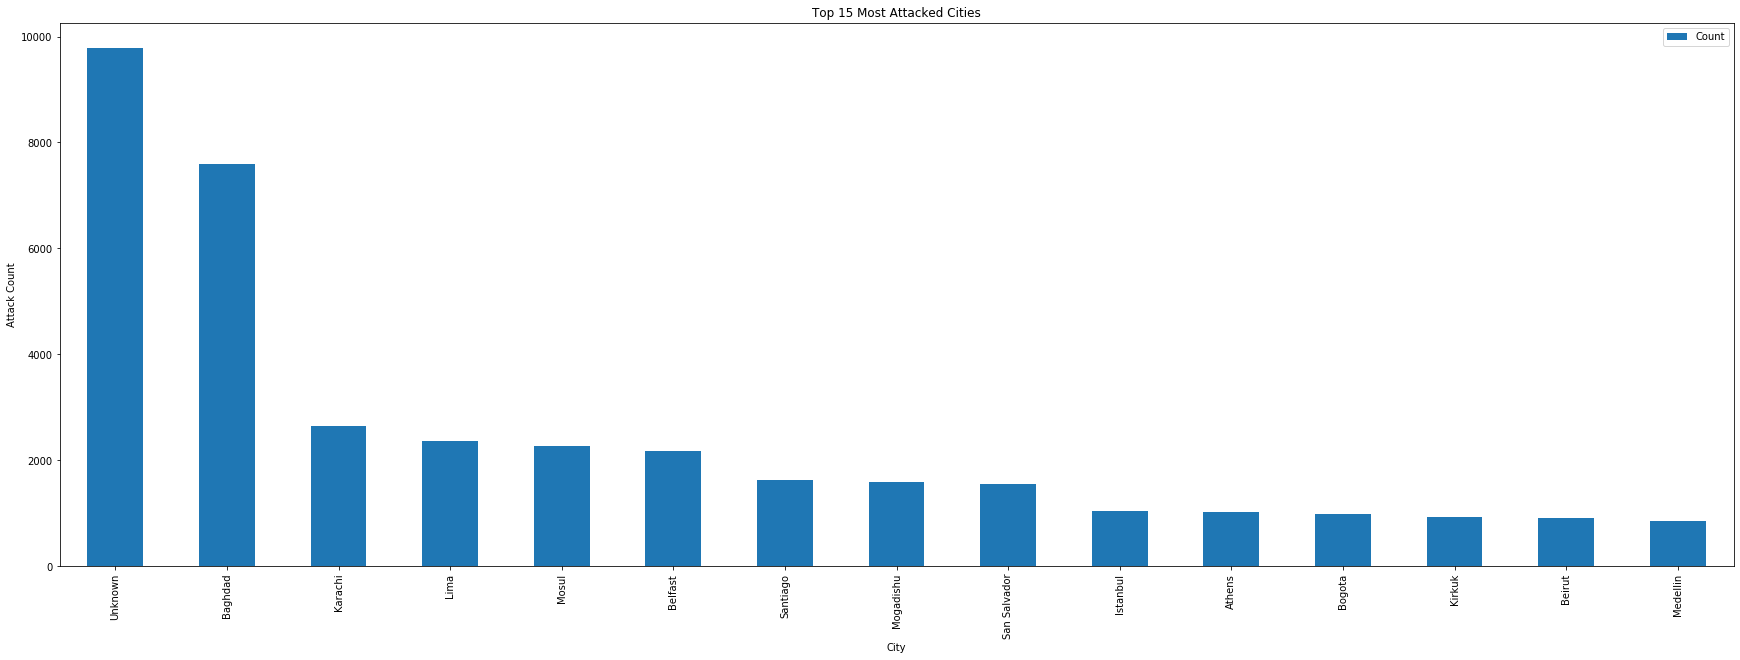

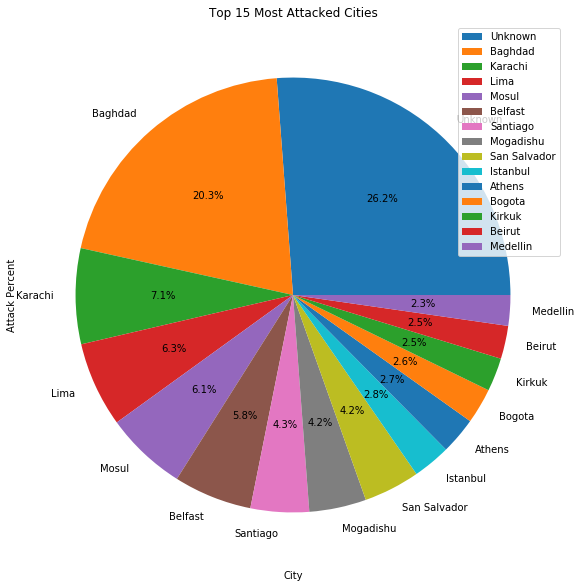

In [33]:
city = gtd.groupby("city")["region_txt"].count()
cityattacks = pd.DataFrame({"Count":city})
cityatt = cityattacks.nlargest(15,'Count')
cityatt.plot(kind="bar", figsize=(30,10))
plt.title("Top 15 Most Attacked Cities")
plt.xlabel("City")
plt.ylabel("Attack Count")
plt.savefig("Images/CityAttackBar.png")
cityatt.plot(kind="pie",subplots = True,autopct="%1.1f%%", figsize=(30,10))
plt.title("Top 15 Most Attacked Cities")
plt.xlabel("City")
plt.ylabel("Attack Percent")
plt.savefig("Images/CityAttackPie.png")

# Terror Success Rate by Region

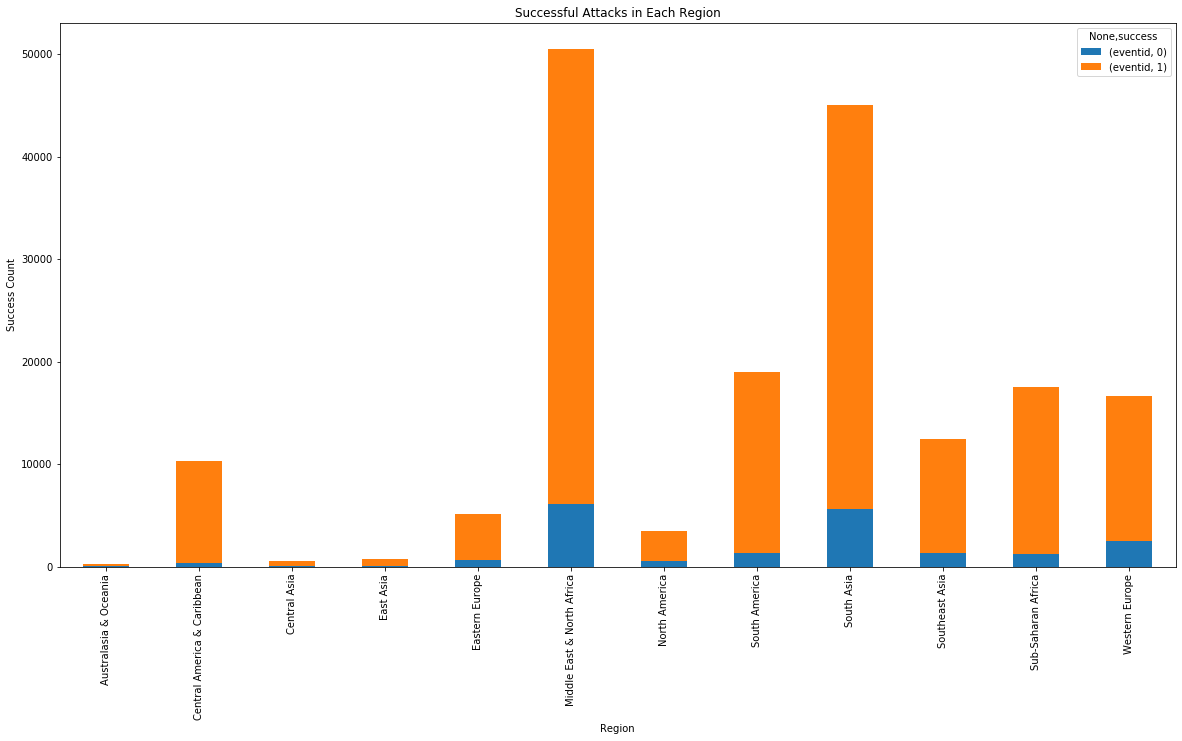

In [34]:
regionsuccess = pd.DataFrame(gtd,columns = ["region_txt","success","eventid"])
newdf = regionsuccess.groupby(["region_txt","success"]).count()
newdf.reset_index(inplace = True)
regionsuccessgraph = newdf.groupby(["region_txt","success"]).max().unstack().plot(kind = "bar",stacked = True, figsize = (20,10))
plt.title("Successful Attacks in Each Region")
plt.xlabel("Region")
plt.ylabel("Success Count")
plt.savefig("Images/SuccessfulAttackBar.png")

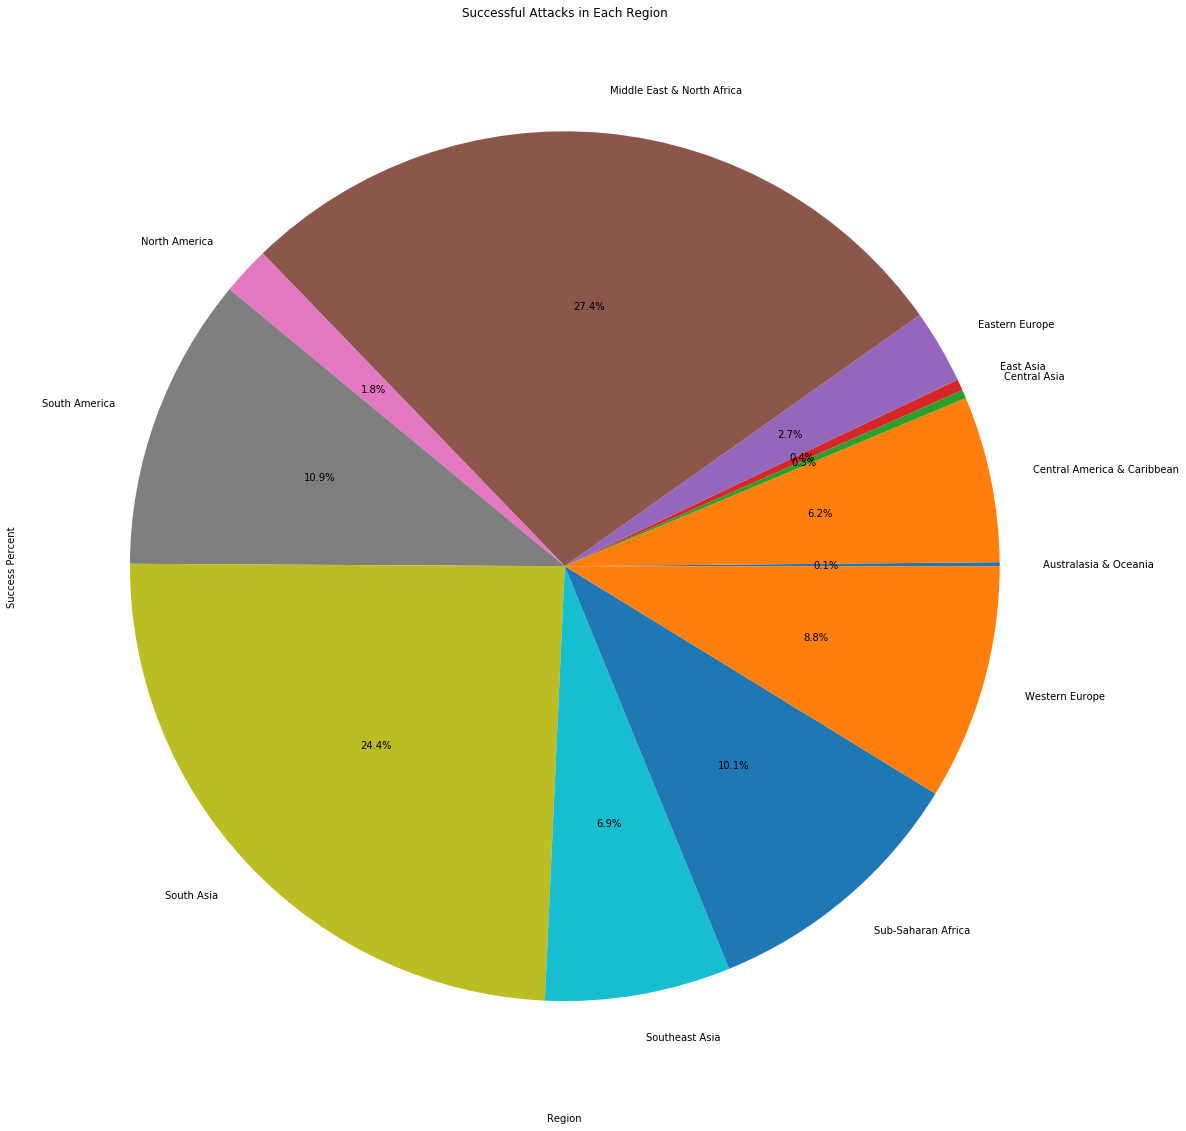

In [35]:
successpie = gtd.groupby("region_txt")["success"]
successpie.count()
regionsuccessgraph = successpie.sum()
pie = regionsuccessgraph.plot(kind="pie",autopct="%1.1f%%", figsize=(20,20))
plt.title("Successful Attacks in Each Region")
plt.xlabel("Region")
plt.ylabel("Success Percent")
plt.savefig("Images/SuccessfulAttackPie.png")

# Attack of Terrorism or not? Doubt

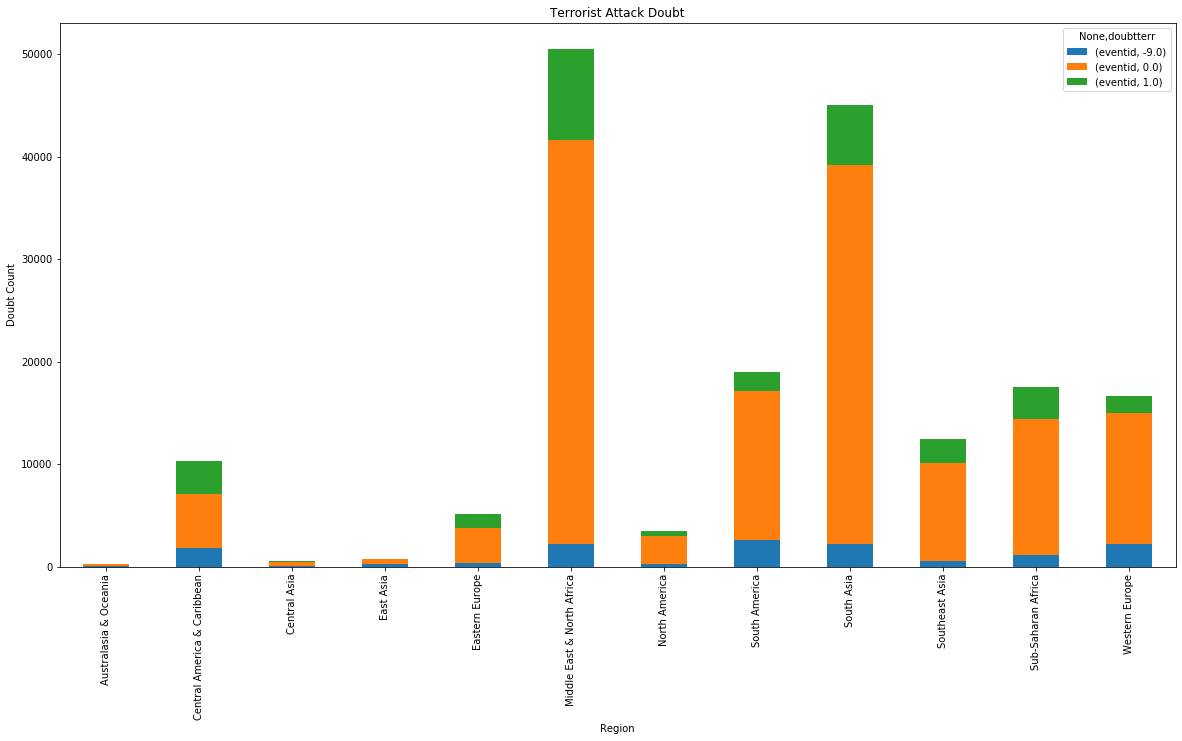

In [36]:
regiondoubt = gtd.groupby("doubtterr")["region_txt"]
regiondoubts = regiondoubt.count()
newdf = pd.DataFrame(gtd,columns = ["region_txt","doubtterr","eventid"])
doubtbyregion = newdf.groupby(["region_txt","doubtterr"]).count()
doubtbyregion.reset_index(inplace = True)
regiondoubtgraph = doubtbyregion.groupby(["region_txt","doubtterr"]).max().unstack().plot(kind = "bar",stacked = True, figsize = (20,10))
plt.title("Terrorist Attack Doubt")
plt.xlabel("Region")
plt.ylabel("Doubt Count")
plt.savefig("Images/TerroristAttackDoubt.png")

# Comparison to US presidents

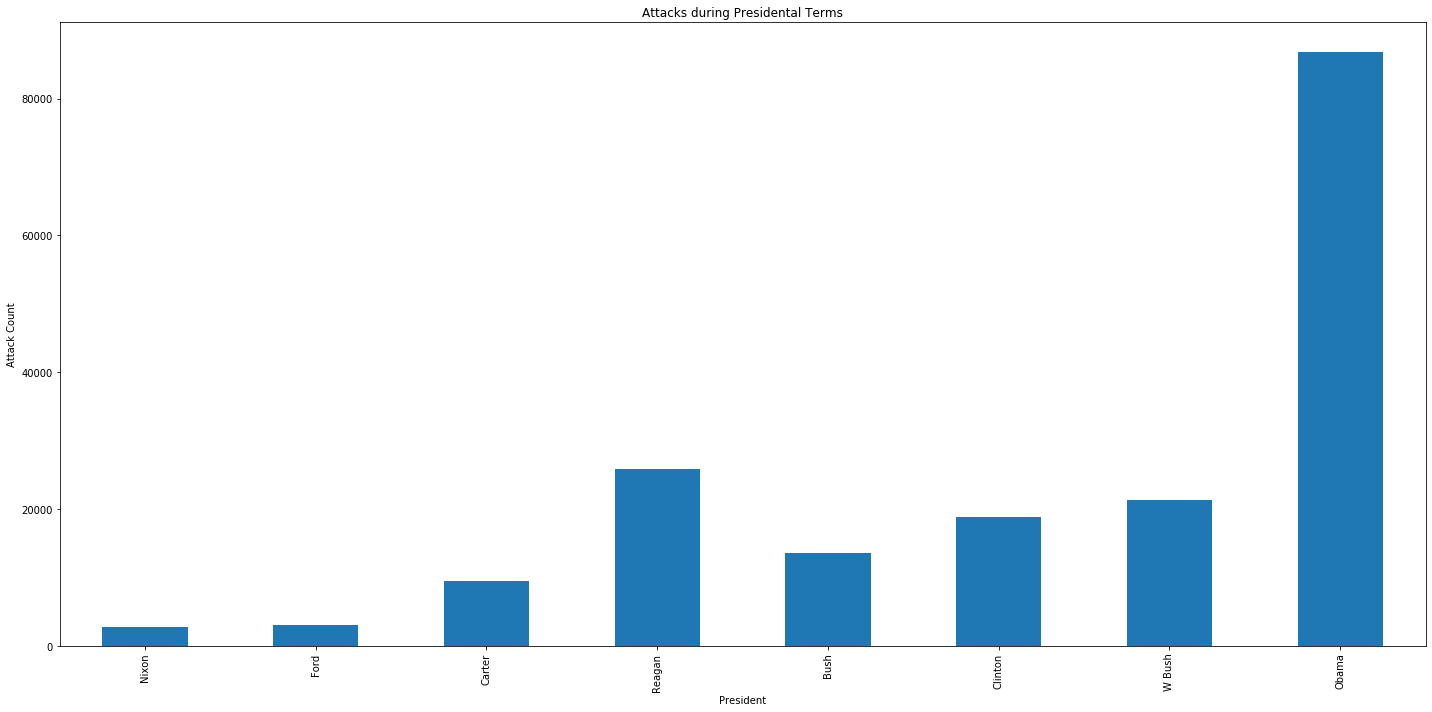

In [37]:
term = [1969,1974,1977,1981,1989,1993,2001,2009,2017]
president = ["Nixon","Ford","Carter","Reagan","Bush","Clinton","W Bush","Obama"]
gtd["President"] = pd.cut(gtd["iyear"],term,labels = president)
presidentcount = gtd.groupby("President")["iyear"]
counts = presidentcount.count()
presidentbar = counts.plot(kind="bar", figsize=(20,10))
presidentdataframe = pd.DataFrame(gtd,columns = ["President","iyear",])
plt.title("Attacks during Presidental Terms")
plt.xlabel("President")
plt.ylabel("Attack Count")
plt.tight_layout()
plt.savefig("Images/PresidentAttacks.png")
plt.show()

# Most Common Type of Attacks

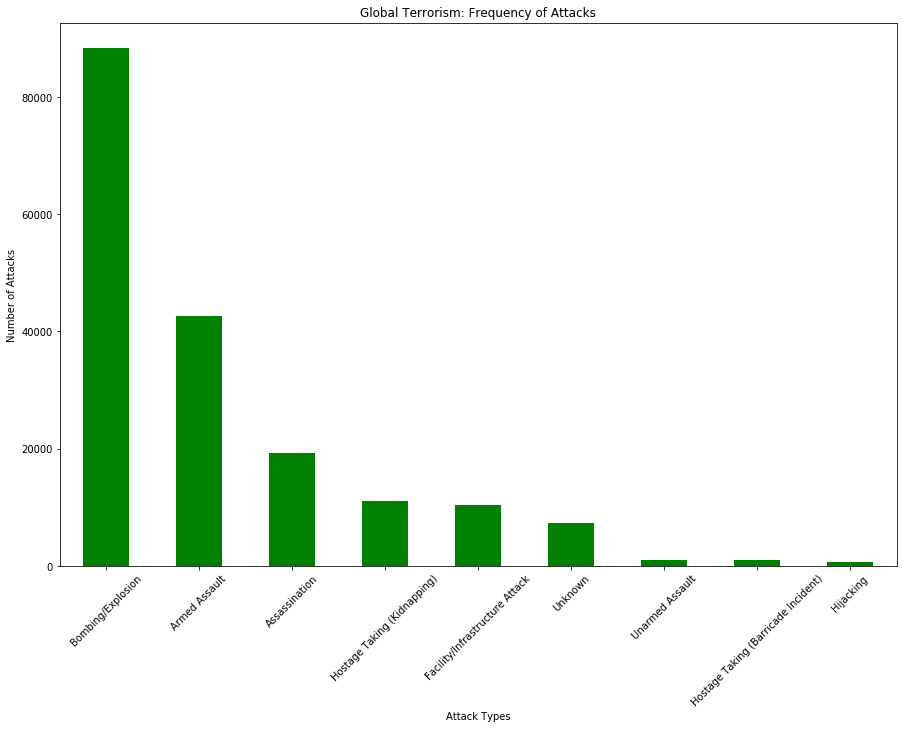

In [3]:
Attack_Type = gtd["attacktype1_txt"].unique()
Attack_Count = gtd["attacktype1_txt"].value_counts()

Attack_Count.plot(kind="bar", facecolor = "green", align="center", figsize=(15,10))

plt.xlabel("Attack Types")
plt.ylabel("Number of Attacks")
plt.title("Global Terrorism: Frequency of Attacks")

plt.xticks(rotation=45)

plt.savefig("Images/AttackTypeBar1.png")

plt.show()

# Trend in Type of Attacks

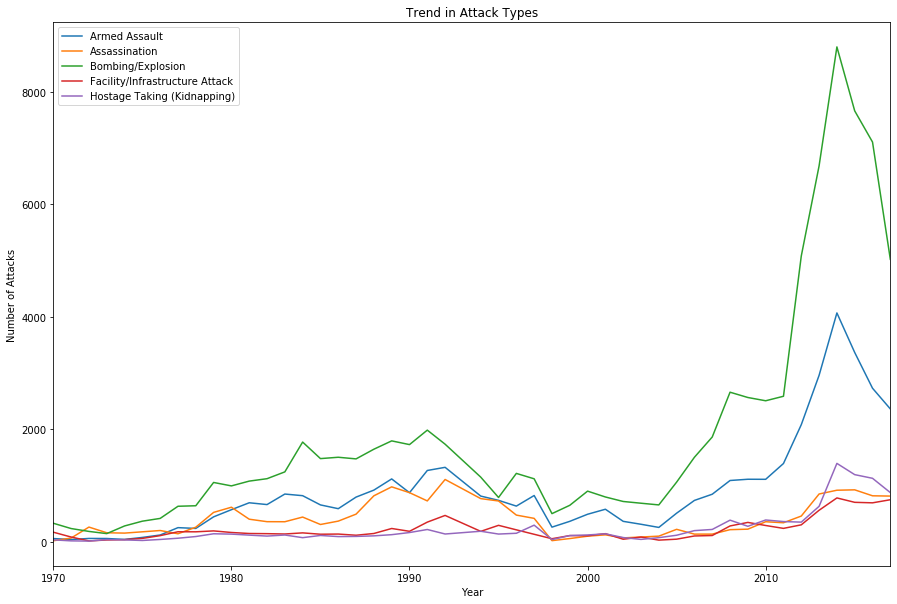

In [4]:
AttackTrend = pd.DataFrame(gtd, columns = ["eventid", "attacktype1_txt", "iyear"])

Attack_Count = AttackTrend.groupby(["attacktype1_txt"]).count()
Attack_Count = AttackTrend.sort_values(by="eventid", ascending=False)

Attack_Count = AttackTrend[AttackTrend["attacktype1_txt"].isin(["Bombing/Explosion", "Armed Assault", "Assassination", "Hostage Taking (Kidnapping)","Facility/Infrastructure Attack"])]
Attack_Count = Attack_Count.groupby(["attacktype1_txt", "iyear"]).count()
Attack_Count = Attack_Count.reset_index()

Attack_Count.pivot(index="iyear", columns="attacktype1_txt", values="eventid").plot(figsize=(15,10))

plt.ylabel("Number of Attacks")
plt.xlabel("Year")
plt.title("Trend in Attack Types")
plt.legend(title="")

plt.savefig("Images/AttackTypeLine1.png")

plt.show()

# Most Popular Type of Attack by Region

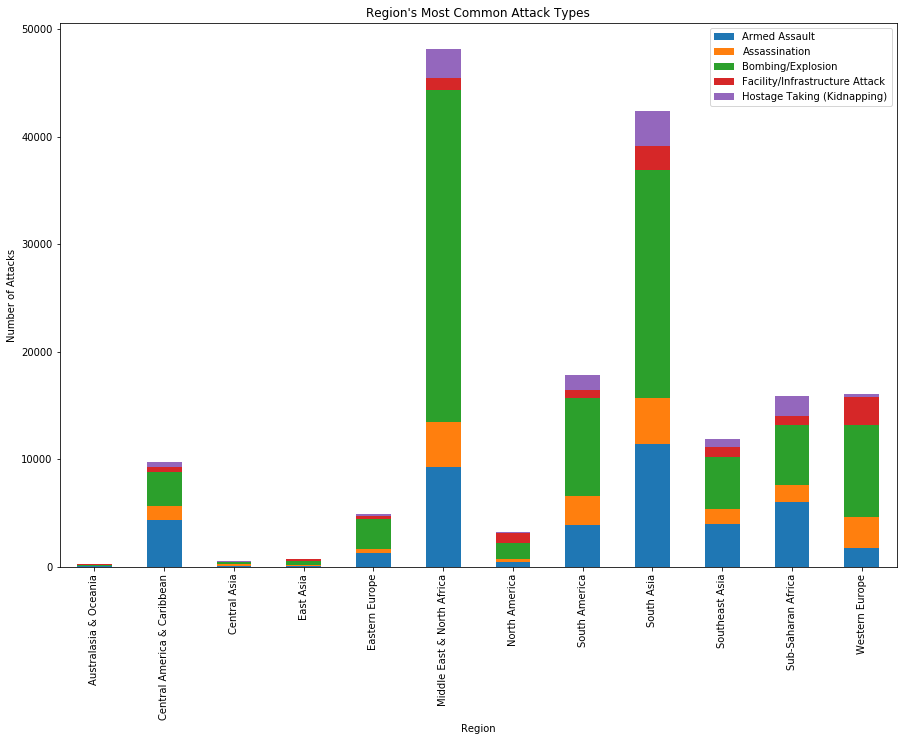

In [5]:
Region_Attack = pd.DataFrame(gtd, columns = ["eventid", "attacktype1_txt", "region_txt"])

Region_Count = Region_Attack.groupby(["attacktype1_txt"]).count()
Region_Count = Region_Attack.sort_values(by="eventid", ascending=False)

Region_Count = Region_Attack[Region_Attack["attacktype1_txt"].isin(["Bombing/Explosion", "Armed Assault", "Assassination", "Hostage Taking (Kidnapping)","Facility/Infrastructure Attack"])]
Region_Count = Region_Count.groupby(["region_txt", "attacktype1_txt"]).count()

Region_Count.unstack(level=1)

Region_Count.reset_index(inplace = True)

Region_Graph= Region_Count.groupby(["region_txt", "attacktype1_txt"]).max()["eventid"].unstack().plot(kind="bar", stacked=True, figsize=(15,10))

plt.ylabel("Number of Attacks")
plt.xlabel("Region")
plt.title("Region's Most Common Attack Types")
plt.legend(title="")

plt.savefig("Images/RegionTypeBar1.png")

plt.show()

# Most Popular Weapon by Region

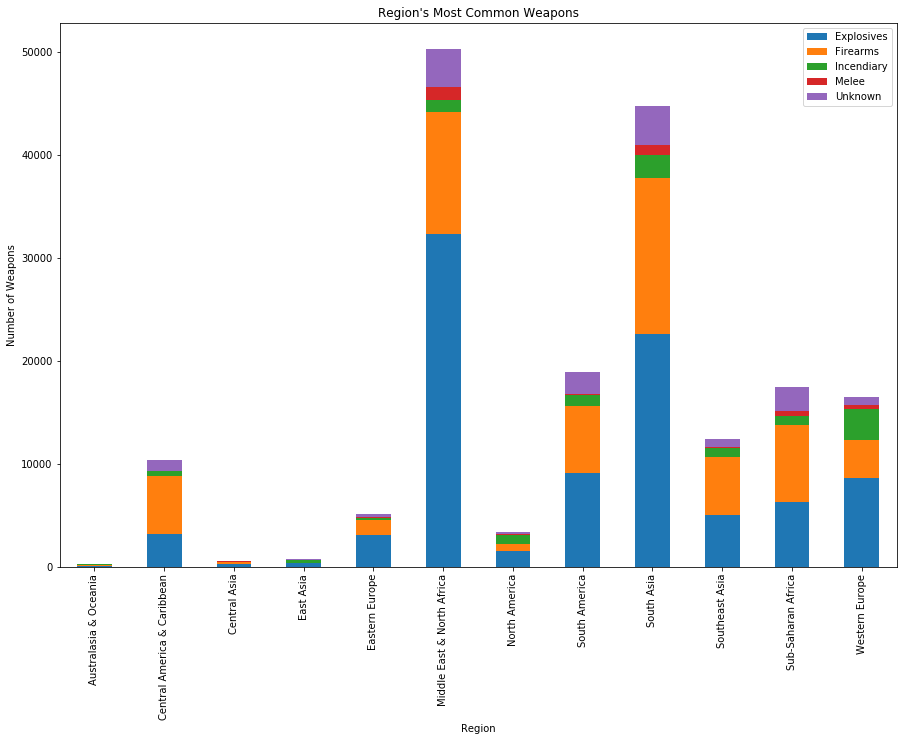

In [6]:
Region_Weapon = pd.DataFrame(gtd, columns = ["eventid", "weaptype1_txt", "region_txt"])

Weapon_Count = Region_Weapon.groupby(["weaptype1_txt"]).count()
Weapon_Count = Region_Weapon.sort_values(by="eventid", ascending=False)

Weapon_Count = Weapon_Count[Weapon_Count["weaptype1_txt"].isin(["Explosives", "Firearms", "Unknown", "Incendiary", "Melee"])]
Weapon_Count = Weapon_Count.groupby(["region_txt", "weaptype1_txt"]).count()

Weapon_Count.unstack(level=1)

Weapon_Count.reset_index(inplace = True)

Weapon_Graph= Weapon_Count.groupby(["region_txt", "weaptype1_txt"]).max()["eventid"].unstack().plot(kind="bar", stacked=True, figsize=(15,10))

plt.ylabel("Number of Weapons")
plt.xlabel("Region")
plt.title("Region's Most Common Weapons")
plt.legend(title="")

plt.savefig("Images/RegionWeaponBar1.png")

plt.show()

# Most Common Target by Region

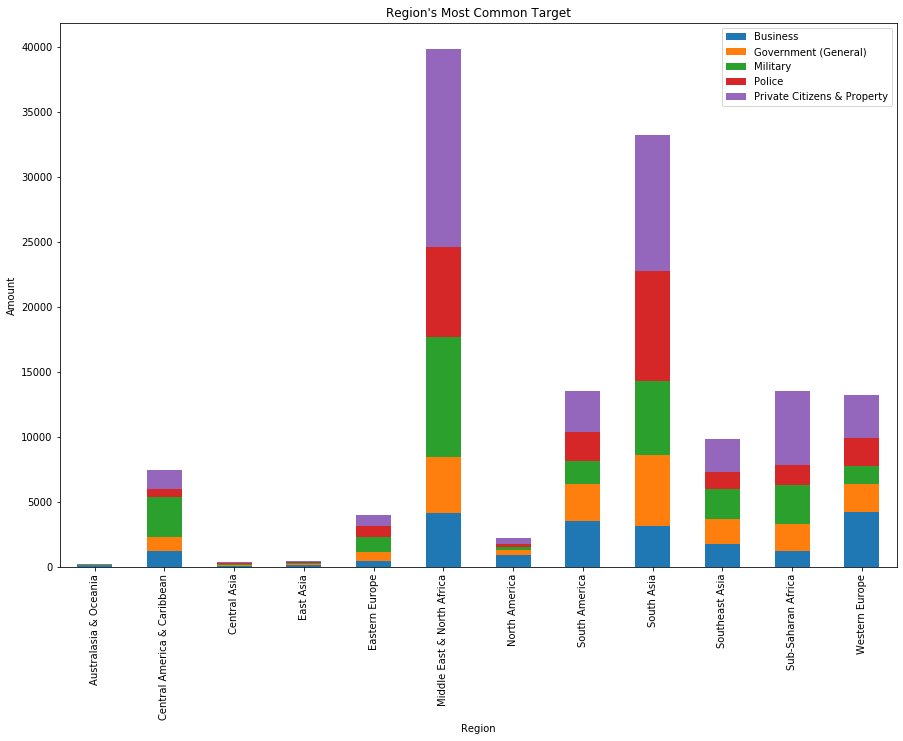

In [7]:
Region_Target = pd.DataFrame(gtd, columns = ["eventid", "targtype1_txt", "region_txt"])

Target_Count = Region_Target.groupby(["targtype1_txt"]).count()
Target_Count = Region_Target.sort_values(by="eventid", ascending=False)

Target_Count = Target_Count[Target_Count["targtype1_txt"].isin(["Private Citizens & Property", "Military", "Police", "Government (General)", "Business"])]
Target_Count = Target_Count.groupby(["region_txt", "targtype1_txt"]).count()

Target_Count.unstack(level=1)

Target_Count.reset_index(inplace = True)

Target_Graph= Target_Count.groupby(["region_txt", "targtype1_txt"]).max()["eventid"].unstack().plot(kind="bar", stacked=True, figsize=(15,10))

plt.ylabel("Amount")
plt.xlabel("Region")
plt.title("Region's Most Common Target")
plt.legend(title="")

plt.savefig("Images/RegionTargetBar1.png")

plt.show()

# Who is the most common target(institution) to these attacks?

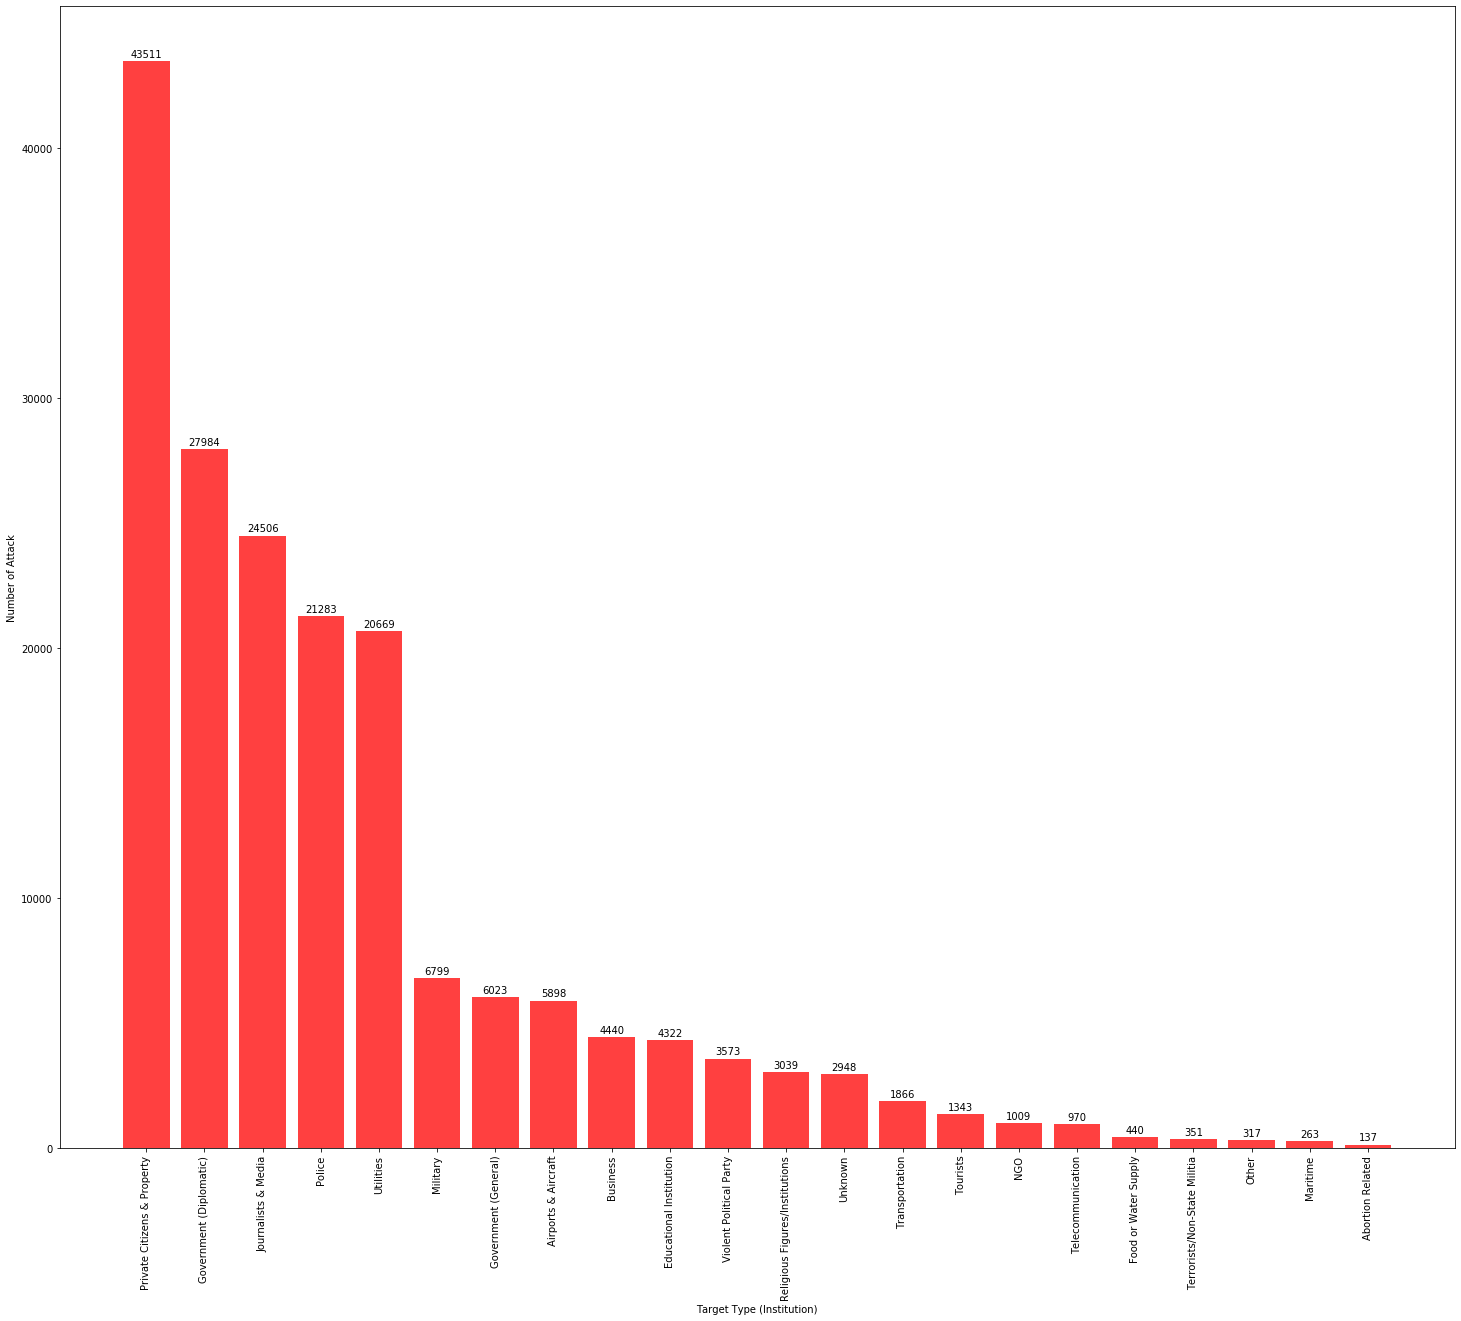

In [38]:
Target = gtd["targtype1_txt"].unique()
Targetcount = gtd["targtype1_txt"].value_counts()

plt.figure(figsize=(25,21))

plt.bar(Target, Targetcount, facecolor="red", alpha=0.75, align="center")

plt.xticks(rotation=90)

for x,y in zip(Target, Targetcount):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,4),
                 ha='center')

plt.xlabel("Target Type (Institution)")
plt.ylabel("Number of Attack")

plt.savefig('Images/Target_Attack_bar.png')
plt.show()


# Success Rate by Target of Terror

# Which group is behind the majority of these attacks?
# - Trend over the years?

C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


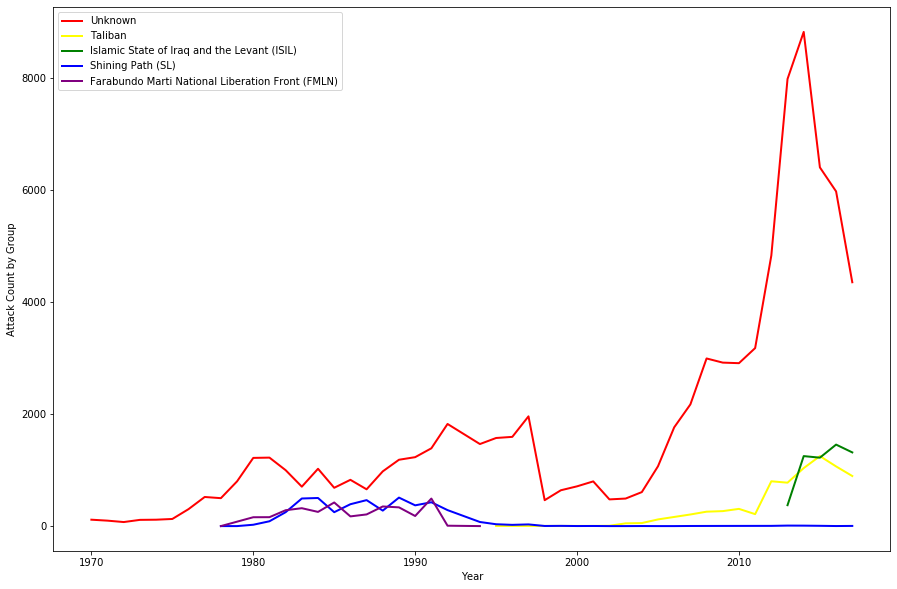

In [39]:
Groupbehind = pd.DataFrame(gtd, columns = ["eventid", "gname", "iyear"])
GroupbehindCount = Groupbehind.groupby(['gname']).count()
GroupbehindCount = Groupbehind.reset_index()
GroupbehindCount = Groupbehind.sort_values(by='eventid', ascending=False)
GroupbehindCount.head(5)

Top5Group = Groupbehind[Groupbehind["gname"].isin(['Unknown','Taliban','Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)','Farabundo Marti National Liberation Front (FMLN)'])]
Top5Group = Top5Group.groupby(['gname', 'iyear']).count()
Top5Group = Top5Group.reset_index()
Top5Group

Unknown = Top5Group[Top5Group['gname'].isin(['Unknown'])]
Taliban = Top5Group[Top5Group['gname'].isin(['Taliban'])]
ISIL = Top5Group[Top5Group['gname'].isin(['Islamic State of Iraq and the Levant (ISIL)'])]
SL = Top5Group[Top5Group['gname'].isin(['Shining Path (SL)'])]
FMLN = Top5Group[Top5Group['gname'].isin(['Farabundo Marti National Liberation Front (FMLN)'])]

#TALIBAN - 2002: 7, 2003: 50, 2012: 800 - present
#ISIL - START 2013 Got HQ Raqqa, Syria (2013–2017)
#SL - 1982 - 1992 - Since the capture of its leader Abimael Guzmán in 1992
#FMLN - 1980-1991 Salvadoran Civil War. After peace accords were signed in 1992, all armed FMLN units were demobilized and their organization became a legal left-wing political party in El Salvador

plt.figure(figsize=(15,10))

df=pd.DataFrame({'x': Top5Group["iyear"], 'y1': Unknown["eventid"], 'y2': Taliban["eventid"], 'y3': ISIL["eventid"], 'y4': SL["eventid"], 'y5': FMLN["eventid"] })
plt.plot( 'x', 'y1', data=df, color='red', linewidth=2, label="Unknown")
plt.plot( 'x', 'y2', data=df, color='yellow', linewidth=2, label="Taliban")
plt.plot( 'x', 'y3', data=df, color='green', linewidth=2, label="Islamic State of Iraq and the Levant (ISIL)")
plt.plot( 'x', 'y4', data=df, color='blue', linewidth=2, label="Shining Path (SL)")
plt.plot( 'x', 'y5', data=df, color='purple', linewidth=2, label="Farabundo Marti National Liberation Front (FMLN)")

plt.xlabel("Year")
plt.ylabel("Attack Count by Group")

plt.savefig("Images/Target_Attack_Group_Year.png")

plt.legend()



# Trend of the U.S fatalities vs International fatalities

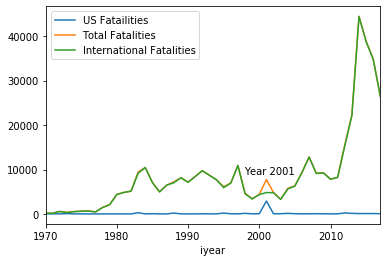

In [41]:
#US fatalities vs international fatalities - line plot for this
Fatalities = pd.DataFrame(gtd, columns = ["iyear", "nkillus", "nkill"])


Fatalities_Sum = Fatalities.groupby(["iyear"]).sum()
Fatalities_Sum["International Fatalities"] = Fatalities_Sum['nkill'] - Fatalities_Sum['nkillus']
Fatalities_Sum = Fatalities_Sum.rename(columns={"iyear": "Year", "nkillus": "US Fatailities", "nkill": "Total Fatalities"})


Fatalities_Sum.plot.line()
plt.text(2005,9000,'Year 2001',horizontalalignment='right')

#US FATAL 2001year - 2915 (9.11 - 2907)

plt.savefig("Images/Fatalities_comparison.png")